In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import os, sys
dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
if not dir1 in sys.path: 
    sys.path.append(dir1)

import numpy as np
import torch
from fuzzy_artmap import FuzzyArtMap

In [2]:
rects = {}
def update_rect(index, bottom_left, height, width, in_class):
    edge_color = "b"
    if in_class:
        edge_color = "r"
    if height < 0.0001 and width < 0.0001:
        height = 0.01
        width = 0.01
    rect = patches.Rectangle(bottom_left, width, height, linewidth=1, edgecolor=edge_color, facecolor='none')
    if index in rects:
        rects[index].remove()
    rects[index] = rect
    axes.add_artist(rect)

51


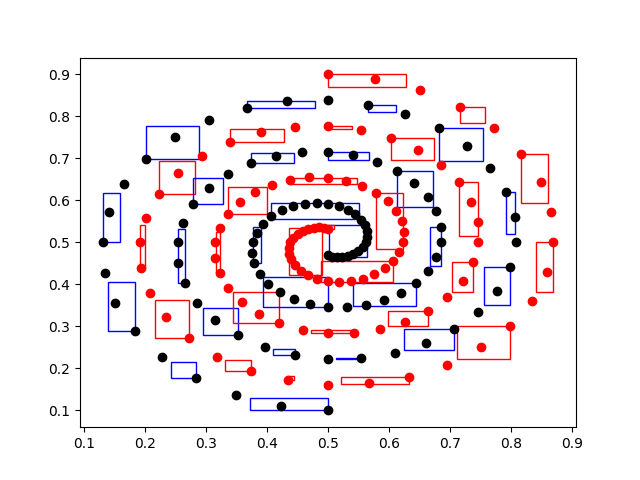

In [3]:

#spirals

white_spiral = []
black_spiral = []
for n in range(1,98):
    alpha_n = (np.pi*(n-1)) / 16
    r_n = 0.4*((105-n)/104)
    white_x = r_n * np.sin(alpha_n) + 0.5
    white_y = r_n * np.cos(alpha_n) + 0.5
    black_x = 1 - white_x
    black_y = 1 - white_y
    white_spiral.append([white_x, white_y])
    black_spiral.append([black_x, black_y])

white_spiral = torch.from_numpy(np.array(white_spiral))
black_spiral = torch.from_numpy(np.array(black_spiral))

figure, axes = plt.subplots()

# 0 1 == _black_
# 1 0 == _white_

black_vector = torch.from_numpy(np.array([[0, 1]]))
white_vector = torch.from_numpy(np.array([[1, 0]]))
spiralFuzzy = x = FuzzyArtMap(baseline_vigilance = 0.9)

for i, white_point in enumerate(white_spiral):
    white_input = FuzzyArtMap.complement_encode(white_point[None,:])
    spiralFuzzy.fit(white_input, white_vector)
    
    black_input = FuzzyArtMap.complement_encode(black_spiral[i][None,:])
    spiralFuzzy.fit(black_input, black_vector)

axes.plot(white_spiral[:, 0], white_spiral[:, 1], "ro")
axes.plot(black_spiral[:, 0], black_spiral[:, 1], "ko")

out_boxes = spiralFuzzy.get_weight_ab()[:, 0] > spiralFuzzy.get_weight_ab()[:, 1]
print(np.count_nonzero(spiralFuzzy.get_weight_a()[:, 0] < 1, 0))

for j in range(spiralFuzzy.get_weight_a().shape[0]):
    is_out_box = out_boxes[j]
    bottom_left = (spiralFuzzy.get_weight_a()[j,0], spiralFuzzy.get_weight_a()[j,1])
    width = (1-spiralFuzzy.get_weight_a()[j,2]) - spiralFuzzy.get_weight_a()[j,0]
    height =(1-spiralFuzzy.get_weight_a()[j,3]) - spiralFuzzy.get_weight_a()[j,1]
    update_rect(j, bottom_left, height, width, is_out_box)

plt.show()